In [59]:
import numpy as np
import matplotlib.pyplot as plt

import gaez_data_loader
import simulation
import toolbox

# use importlib for now
import importlib
importlib.reload(simulation)
importlib.reload(toolbox)
importlib.reload(gaez_data_loader)

<module 'gaez_data_loader' from 'C:\\Users\\leoko\\PycharmProjects\\pythonProject\\gaez_data_loader.py'>

In [60]:
# load instance
params_instance = {"num_iter": 1_000, "seed": 52, "idx_start": (0, 0), "population_growth_rate": 1 / 30,
                   "max_productivity": 800, "n_rows": 10, "n_cols": 10}

base_abm = simulation.Lattice(**params_instance)

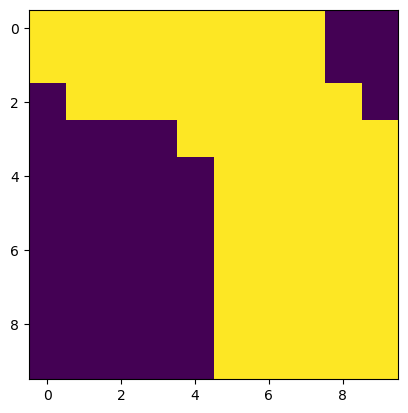

In [61]:
# load environment - here random
base_abm.load_env(env=None, kind="random", num_env_vars=10, correlation_length=0.1, verbose=True)

# visualize
plt.imshow(base_abm.env[:, :, 8])

In [62]:
# set fission rules
params_fission = {"migration_threshold": 1, "include_diagonals": False, "search_distance_pixels": 5,
                  "search_intelligently": True, "max_distance_km": None}

params_are_relative = True
fission_bounds = (1, 5)  # fission requires at least two matching skills and occurs with certainty if >= 5 skills match
migration_threshold = 1  # requires at least one matching skill

base_abm.set_fission_rules(**params_fission)
base_abm.set_fission_distribution(fission_bounds, migration_threshold,
                                  params_are_relative=params_are_relative, kind="linear")

# Check set rates
print("Maximum carrying capacity is", base_abm.max_productivity)
print("Bounds for fission probabilities (min, max) are", base_abm.pop_min, base_abm.pop_max)

Maximum carrying capacity is 800
Bounds for fission probabilities (min, max) are 80.0 400.0


In [63]:
# run with no mutations
base_abm.run()

100%|██████████| 999/999 [00:01<00:00, 915.19it/s] 


In [64]:
# get population
population = base_abm.population

population[np.isnan(population)] = 0 # to clean for NaN values
pop_total = np.sum(population, axis=(1, 2))

Text(0, 0.5, '# villagers')

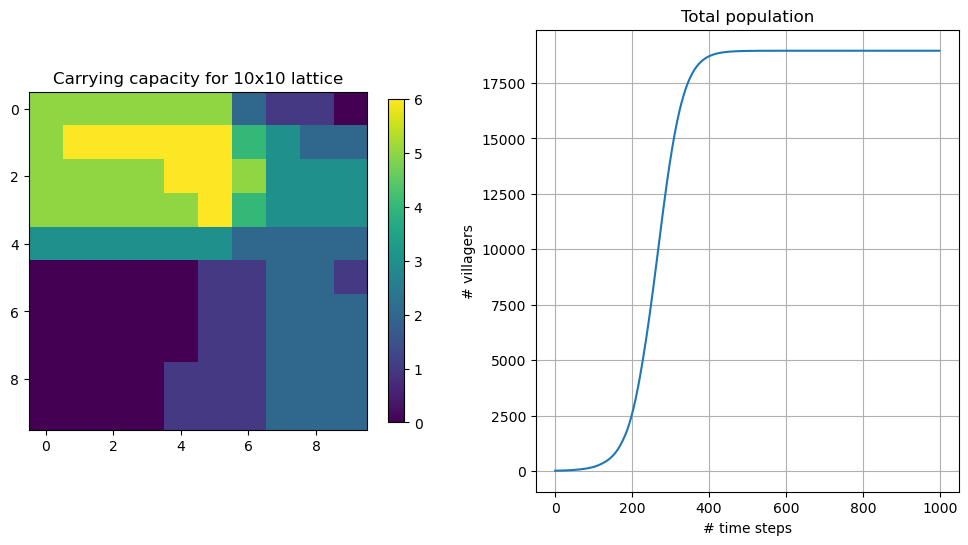

In [70]:
# plot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

plot = ax1.imshow(base_abm.prod / base_abm.productivity_step_size)
ax1.set_title("Carrying capacity for 10x10 lattice")
fig.colorbar(plot, ax=ax1, shrink=0.7)

# ax2.plot(pop_total)
# ax2.grid()
# ax2.set_title("Total population")
# ax2.set_xlabel("# time steps")
# ax2.set_ylabel("# villagers")

ax2.plot()